In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
airline_book= pd.read_csv(r'/Users/daviddangol/Documents/monthly report/domestic airlines/data/Airlines Transaction Report oct15tonov1st2025_updated.csv')

In [3]:
display(airline_book.head())
airline_book.info()
display(airline_book.describe())
print(airline_book.columns)

,Txn_Date,Parent_Txn_code,Account_id,Final_Status,Txn_Amount (Parent_Txn_Amount),Is One/Two Way?,Total Ticket Numbers,Product_Name,Sector,Outbound_PNR_No,Outbound_Ticket_Numbers,Total_Commision,Total_TXn_amt,Total_Cashback,Profile
0,10/15/2025,14OHEP9,8684499,COMPLETE,5472.0,One Way,1,BUDDHA AIR,KATHMANDU-JANAKPUR,7TO95Q,30416630,2719.73,2719.73,0.0,User
1,10/15/2025,14OHGCU,4840450,COMPLETE,18565.8,One Way,4,BUDDHA AIR,KATHMANDU-BHARATPUR,7ZK26Q,"30416633,30416634,30416635,30416636",8360.16,8360.16,0.0,User
2,10/15/2025,14OHGDV,5028607,COMPLETE,5600.0,One Way,1,YETI AIRLINES,KATHMANDU-BIRATNAGAR,A64DL8,9992110072085,2600.00,2600.00,0.0,User
3,10/15/2025,14OHGK5,883188,COMPLETE,4295.0,One Way,1,SHREE AIRLINES,KATHMANDU-POKHARA,QCVJN7,10417359,2400.00,2400.00,0.0,User
4,10/15/2025,14OHHNG,79308,COMPLETE,6000.0,One Way,1,BUDDHA AIR,BIRATNAGAR-KATHMANDU,ROMJFU,30416638,2301.00,2301.00,0.0,User


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34620 entries, 0 to 34619
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Txn_Date                        34620 non-null  object 
 1   Parent_Txn_code                 34620 non-null  object 
 2   Account_id                      34620 non-null  int64  
 3   Final_Status                    34620 non-null  object 
 4   Txn_Amount (Parent_Txn_Amount)  34620 non-null  float64
 5   Is One/Two Way?                 34620 non-null  object 
 6   Total Ticket Numbers            34620 non-null  int64  
 7   Product_Name                    34620 non-null  object 
 8   Sector                          34617 non-null  object 
 9   Outbound_PNR_No                 34595 non-null  object 
 10  Outbound_Ticket_Numbers         34362 non-null  object 
 11  Total_Commision                 34620 non-null  float64
 12  Total_TXn_amt                   

,Account_id,Txn_Amount (Parent_Txn_Amount),Total Ticket Numbers,Total_Commision,Total_TXn_amt,Total_Cashback
count,3.462000e+04,34620.000000,34620.000000,34620.000000,34620.000000,34620.000000
mean,3.839759e+06,8543.992521,1.358434,4243.556802,4242.050775,1.506027
std,3.262247e+06,4933.406456,0.733527,3237.652615,3237.891860,58.150934
min,1.400000e+01,3581.510000,1.000000,1516.970000,1062.000000,0.000000
25%,8.856632e+05,5200.000000,1.000000,2400.000000,2400.000000,0.000000
50%,3.024373e+06,6975.000000,1.000000,2800.000000,2800.000000,0.000000
75%,5.714435e+06,9800.000000,2.000000,5002.500000,4980.300000,0.000000
max,1.307458e+07,80800.000000,16.000000,118944.000000,118944.000000,5850.000000


Index(['Txn_Date', 'Parent_Txn_code', 'Account_id', 'Final_Status',
       'Txn_Amount (Parent_Txn_Amount)', 'Is One/Two Way?',
       'Total Ticket Numbers', 'Product_Name', 'Sector', 'Outbound_PNR_No',
       'Outbound_Ticket_Numbers', 'Total_Commision', 'Total_TXn_amt',
       'Total_Cashback', 'Profile'],
      dtype='object')


In [25]:
min_date = airline_book['Txn_Date'].min()
max_date = airline_book['Txn_Date'].max()

print(f"Minimum Transaction Date: {min_date}")
print(f"Maximum Transaction Date: {max_date}")

Minimum Transaction Date: 2025-10-15 00:00:00
Maximum Transaction Date: 2025-10-31 00:00:00


In [5]:
# Calculate and display the total transaction amount
total_txn_amount = airline_book['Total_TXn_amt'].sum()
print(f"Total Transaction Amount: {total_txn_amount:.2f}")

Total Transaction Amount: 146859797.84


In [6]:
# Convert 'Txn_Date' to datetime objects, coercing errors
airline_book['Txn_Date'] = pd.to_datetime(airline_book['Txn_Date'], errors='coerce')

# Extract date and hour into new columns
airline_book['Txn_Date_Only'] = airline_book['Txn_Date'].dt.date
airline_book['Txn_Hour'] = airline_book['Txn_Date'].dt.hour

# Display the updated DataFrame with new columns
display(airline_book[['Txn_Date', 'Txn_Date_Only', 'Txn_Hour']].head())

,Txn_Date,Txn_Date_Only,Txn_Hour
0,2025-10-15,2025-10-15,0.0
1,2025-10-15,2025-10-15,0.0
2,2025-10-15,2025-10-15,0.0
3,2025-10-15,2025-10-15,0.0
4,2025-10-15,2025-10-15,0.0


In [7]:
import plotly.express as px

In [8]:
# Use Txn_Date_Only and count frequency
date_frequency = airline_book['Txn_Date_Only'].value_counts().sort_index().reset_index()
date_frequency.columns = ['Date', 'Booking_Frequency']

# Create a line chart using Plotly
fig_line = px.line(date_frequency, x='Date', y='Booking_Frequency', title='Booking Frequency Over Time (Line Chart)')

# Add tooltips to line chart
fig_line.update_traces(mode='lines+markers', hovertemplate='Date: %{x}<br>Booking Frequency: %{y}<extra></extra>')

fig_line.show()

In [9]:
# Create a bar chart using Plotly
fig_bar = px.bar(date_frequency, x='Date', y='Booking_Frequency', title='Booking Frequency Over Time (Bar Chart)')

# Add tooltips to bar chart
fig_bar.update_traces(hovertemplate='Date: %{x}<br>Booking Frequency: %{y}<extra></extra>')

fig_bar.show()

In [10]:
# Calculate the total number of bookings
total_bookings = date_frequency['Booking_Frequency'].sum()

# Calculate the percentage of bookings for each date
date_frequency['Percentage'] = (date_frequency['Booking_Frequency'] / total_bookings) * 100

# Display the top 5 dates by booking frequency in a table, formatted to 2 decimal places
display(date_frequency.nlargest(10, 'Booking_Frequency').style.format({'Percentage': '{:.2f}'}))

,Date,Booking_Frequency,Percentage
0,2025-10-15,2523,7.69
1,2025-10-16,2431,7.41
2,2025-10-17,2232,6.80
3,2025-10-18,2195,6.69
4,2025-10-19,2136,6.51
9,2025-10-24,2123,6.47
11,2025-10-26,1960,5.97
6,2025-10-21,1932,5.89
10,2025-10-25,1916,5.84
16,2025-10-31,1801,5.49


In [11]:
# Calculate the frequency of transactions, total transaction amount, and total ticket numbers for each account ID
account_summary = airline_book.groupby('Account_id').agg(
    Transaction_Frequency=('Account_id', 'count'),
    Total_TXn_Amount=('Total_TXn_amt', 'sum'),
    Total_Tickets_Bought=('Total Ticket Numbers', 'sum')
).reset_index()

# Display the top 15 accounts based on transaction frequency, total transaction amount, and total tickets bought
print("Top 5 Accounts by Transaction Frequency:")
display(account_summary.nlargest(5, 'Transaction_Frequency'))



Top 5 Accounts by Transaction Frequency:


,Account_id,Transaction_Frequency,Total_TXn_Amount,Total_Tickets_Bought
5746,765924,15,81808.19,25
17913,4446488,13,57313.88,13
21323,5921017,9,31698.00,10
9040,1494455,8,31829.64,9
13833,3024053,8,25401.24,8


In [12]:
# Total Transaction Amount (High and Low)
max_txn_amount = airline_book['Txn_Amount (Parent_Txn_Amount)'].max()
min_txn_amount = airline_book['Txn_Amount (Parent_Txn_Amount)'].min()
print(f"Highest Transaction Amount: {max_txn_amount}")
print(f"Lowest Transaction Amount: {min_txn_amount}")

Highest Transaction Amount: 80800.0
Lowest Transaction Amount: 3581.51


In [13]:
# Total Ticket Booked Count
total_tickets = airline_book['Total Ticket Numbers'].sum()
print(f"\nTotal Tickets Booked: {total_tickets}")


Total Tickets Booked: 47029


In [14]:
# Top % of Booked Destinations and Count
sector_counts = airline_book['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Count']
sector_counts['Percentage'] = (sector_counts['Count'] / sector_counts['Count'].sum()) * 100
print("\nTop Booked Destinations:")
display(sector_counts.head(10).round({'Percentage': 2}))



Top Booked Destinations:


,Sector,Count,Percentage
0,BIRATNAGAR-KATHMANDU,3510,10.14
1,BHAIRAHAWA-KATHMANDU,3037,8.77
2,KATHMANDU-BIRATNAGAR,2908,8.40
3,KATHMANDU-BHAIRAHAWA,2772,8.01
4,NEPALGUNJ-KATHMANDU,2475,7.15
5,KATHMANDU-POKHARA,2448,7.07
6,POKHARA-KATHMANDU,2335,6.75
7,KATHMANDU-NEPALGUNJ,1882,5.44
8,DHANGADHI-KATHMANDU,1828,5.28
9,BHADRAPUR-KATHMANDU,1615,4.67


In [15]:
# Top Airline with Count and %
airline_counts = airline_book['Product_Name'].value_counts().reset_index()
airline_counts.columns = ['Airline', 'Count']
airline_counts['Percentage'] = (airline_counts['Count'] / airline_counts['Count'].sum()) * 100
print("\nTop Airlines:")
display(airline_counts.head().round({'Percentage': 2}))


Top Airlines:


,Airline,Count,Percentage
0,BUDDHA AIR,17609,50.86
1,SHREE AIRLINES,9406,27.17
2,YETI AIRLINES,7605,21.97


In [16]:
# Total Commission and Cashback
total_commission = airline_book['Total_Commision'].sum()
total_cashback = airline_book['Total_Cashback'].sum()

print(f"Total Commission Earned: {total_commission:.2f}")
print(f"Total Cashback Given: {total_cashback:.2f}")

Total Commission Earned: 146911936.49
Total Cashback Given: 52138.65


In [17]:
# Split the 'Sector' column into 'Departure' and 'Arrival' columns
airline_book[['Departure', 'Arrival']] = airline_book['Sector'].str.split('-', expand=True)

# Display the updated DataFrame with new columns
display(airline_book[['Sector', 'Departure', 'Arrival']].head())

,Sector,Departure,Arrival
0,KATHMANDU-JANAKPUR,KATHMANDU,JANAKPUR
1,KATHMANDU-BHARATPUR,KATHMANDU,BHARATPUR
2,KATHMANDU-BIRATNAGAR,KATHMANDU,BIRATNAGAR
3,KATHMANDU-POKHARA,KATHMANDU,POKHARA
4,BIRATNAGAR-KATHMANDU,BIRATNAGAR,KATHMANDU


In [18]:
# Analyze top departure cities
departure_frequency = airline_book['Departure'].value_counts().reset_index()
departure_frequency.columns = ['Departure City', 'Booking Frequency']

# Create a bar chart for top departure cities
fig_departure = px.bar(departure_frequency.head(10), # Displaying top 10 for better visualization
                       x='Departure City',
                       y='Booking Frequency',
                       title='Top 10 Departure Cities by Booking Frequency')

# Add tooltips
fig_departure.update_traces(hovertemplate='Departure City: %{x}<br>Booking Frequency: %{y}<extra></extra>')

fig_departure.show()

In [20]:
 #Analyze top arrival cities
arrival_frequency = airline_book['Arrival'].value_counts().reset_index()
arrival_frequency.columns = ['Arrival City', 'Booking Frequency']

# Create a bar chart for top arrival cities
fig_arrival = px.bar(arrival_frequency.head(10), # Displaying top 10 for better visualization
                     x='Arrival City',
                     y='Booking Frequency',
                     title='Top 10 Arrival Cities by Booking Frequency')

# Add tooltips
fig_arrival.update_traces(hovertemplate='Arrival City: %{x}<br>Booking Frequency: %{y}<extra></extra>')

fig_arrival.show()

In [21]:
# Group by date and Departure and count the frequency
departure_date_frequency = airline_book.groupby(['Txn_Date_Only', 'Departure']).size().reset_index(name='Booking_Frequency')

# Create a stacked bar chart for Departure cities
fig_departure_date = px.bar(departure_date_frequency,
                            x='Txn_Date_Only',
                            y='Booking_Frequency',
                            color='Departure',
                            title='Daily Booking Frequency by Departure City')

# Add tooltips
fig_departure_date.update_traces(hovertemplate='Date: %{x}<br>Booking Frequency: %{y}<br>Departure City: %{customdata}<extra></extra>',
                                 customdata=departure_date_frequency['Departure'])

fig_departure_date.show()

# Group by date and Arrival and count the frequency
arrival_date_frequency = airline_book.groupby(['Txn_Date_Only', 'Arrival']).size().reset_index(name='Booking_Frequency')

# Create a stacked bar chart for Arrival cities
fig_arrival_date = px.bar(arrival_date_frequency,
                           x='Txn_Date_Only',
                           y='Booking_Frequency',
                           color='Arrival',
                           title='Daily Booking Frequency by Arrival City')

# Add tooltips
fig_arrival_date.update_traces(hovertemplate='Date: %{x}<br>Booking Frequency: %{y}<br>Arrival City: %{customdata}<extra></extra>',
                                customdata=arrival_date_frequency['Arrival'])

fig_arrival_date.show()

In [22]:
# Convert 'Txn_Date_Only' to datetime objects for filtering
airline_book['Txn_Date_Only'] = pd.to_datetime(airline_book['Txn_Date_Only'])

# Define date ranges
range1_start = pd.to_datetime('2025-10-15')
range1_end = pd.to_datetime('2025-10-20')
range2_start = pd.to_datetime('2025-10-21')
range2_end = pd.to_datetime('2025-10-23')
range3_start = pd.to_datetime('2025-10-24')
range3_end = pd.to_datetime('2025-11-01')

# Filter data for each range and for arrivals only
range1_arrivals_df = airline_book[(airline_book['Txn_Date_Only'] >= range1_start) & (airline_book['Txn_Date_Only'] <= range1_end)]
range2_arrivals_df = airline_book[(airline_book['Txn_Date_Only'] >= range2_start) & (airline_book['Txn_Date_Only'] <= range2_end)]
range3_arrivals_df = airline_book[(airline_book['Txn_Date_Only'] >= range3_start) & (airline_book['Txn_Date_Only'] <= range3_end)]


# Function to generate and display date-wise frequency stacked bar chart for arrivals by city
def plot_date_frequency_arrivals_stacked(df, title):
    date_frequency = df.groupby(['Txn_Date_Only', 'Arrival']).size().reset_index(name='Booking_Frequency')
    fig = px.bar(date_frequency,
                 x='Txn_Date_Only',
                 y='Booking_Frequency',
                 color='Arrival',
                 title=title)
    fig.update_traces(hovertemplate='Date: %{x}<br>Booking Frequency: %{y}<br>Arrival City: %{customdata}<extra></extra>',
                      customdata=date_frequency['Arrival'])
    fig.show()

# Generate and display charts for each range
plot_date_frequency_arrivals_stacked(range1_arrivals_df, 'Arrival Booking Frequency by City: Oct 15 - Oct 20')
plot_date_frequency_arrivals_stacked(range2_arrivals_df, 'Arrival Booking Frequency by City: Oct 21 - Oct 23')
plot_date_frequency_arrivals_stacked(range3_arrivals_df, 'Arrival Booking Frequency by City: Oct 24 - Nov 1')

In [23]:
# Filter out rows where Arrival is 'KATHMANDU'
arrivals_excluding_kathmandu = airline_book[airline_book['Arrival'] != 'KATHMANDU']

# Analyze top arrival cities excluding Kathmandu
arrival_frequency_no_kathmandu = arrivals_excluding_kathmandu['Arrival'].value_counts().reset_index()
arrival_frequency_no_kathmandu.columns = ['Arrival City', 'Booking Frequency']

# Create a bar chart for top arrival cities excluding Kathmandu
fig_arrival_no_kathmandu = px.bar(arrival_frequency_no_kathmandu.head(10), # Displaying top 10 for better visualization
                                   x='Arrival City',
                                   y='Booking Frequency',
                                   title='Top 10 Arrival Cities by Booking Frequency (Excluding Kathmandu)')

# Add tooltips
fig_arrival_no_kathmandu.update_traces(hovertemplate='Arrival City: %{x}<br>Booking Frequency: %{y}<extra></extra>')

fig_arrival_no_kathmandu.show()

In [24]:
# Define date ranges
range1_start = pd.to_datetime('2025-10-15')
range1_end = pd.to_datetime('2025-10-20')
range2_start = pd.to_datetime('2025-10-21')
range2_end = pd.to_datetime('2025-10-23')
range3_start = pd.to_datetime('2025-10-24')
range3_end = pd.to_datetime('2025-11-01')

# Filter the arrivals_excluding_kathmandu DataFrame for each range
range1_arrivals_no_kathmandu_df = arrivals_excluding_kathmandu[(arrivals_excluding_kathmandu['Txn_Date_Only'] >= range1_start) & (arrivals_excluding_kathmandu['Txn_Date_Only'] <= range1_end)]
range2_arrivals_no_kathmandu_df = arrivals_excluding_kathmandu[(arrivals_excluding_kathmandu['Txn_Date_Only'] >= range2_start) & (arrivals_excluding_kathmandu['Txn_Date_Only'] <= range2_end)]
range3_arrivals_no_kathmandu_df = arrivals_excluding_kathmandu[(arrivals_excluding_kathmandu['Txn_Date_Only'] >= range3_start) & (arrivals_excluding_kathmandu['Txn_Date_Only'] <= range3_end)]

# Function to generate and display date-wise frequency stacked bar chart for arrivals by city (excluding Kathmandu)
def plot_date_frequency_arrivals_no_kathmandu_stacked(df, title):
    date_frequency = df.groupby(['Txn_Date_Only', 'Arrival']).size().reset_index(name='Booking_Frequency')
    fig = px.bar(date_frequency,
                 x='Txn_Date_Only',
                 y='Booking_Frequency',
                 color='Arrival',
                 title=title)
    fig.update_traces(hovertemplate='Date: %{x}<br>Booking Frequency: %{y}<br>Arrival City: %{customdata}<extra></extra>',
                      customdata=date_frequency['Arrival'])
    fig.show()

# Generate and display charts for each range
plot_date_frequency_arrivals_no_kathmandu_stacked(range1_arrivals_no_kathmandu_df, 'Arrival Booking Frequency by City (Excluding Kathmandu): Oct 15 - Oct 20')
plot_date_frequency_arrivals_no_kathmandu_stacked(range2_arrivals_no_kathmandu_df, 'Arrival Booking Frequency by City (Excluding Kathmandu): Oct 21 - Oct 23')
plot_date_frequency_arrivals_no_kathmandu_stacked(range3_arrivals_no_kathmandu_df, 'Arrival Booking Frequency by City (Excluding Kathmandu): Oct 24 - Nov 1')

In [ ]:
airline_book['Account_id']

Account_id
765924     15
4446488    13
5921017     9
1494455     8
4686718     8
Name: count, dtype: int64

In [28]:
# Create a new DataFrame with 'Parent_Txn_code' (assuming it's the account ID) and 'Arrival' columns
account_arrival_df = airline_book[['Account_id', 'Arrival']].copy()

# Display the first few rows of the new DataFrame
display(account_arrival_df.head())

,Account_id,Arrival
0,8684499,JANAKPUR
1,4840450,BHARATPUR
2,5028607,BIRATNAGAR
3,883188,POKHARA
4,79308,KATHMANDU


In [30]:
# Save the account_arrival_df DataFrame to a CSV file
account_arrival_df.to_csv('account_arrival_data.csv', index=False)

In [31]:
# Group by Account_id and count the occurrences
account_counts = account_arrival_df['Account_id'].value_counts().reset_index()
account_counts.columns = ['Account_id', 'Count']

# Filter for accounts with a count greater than 1
accounts_more_than_once = account_counts[account_counts['Count'] > 1]

# Merge the filtered counts back with the original DataFrame to get arrival details
accounts_with_multiple_arrivals = pd.merge(accounts_more_than_once, account_arrival_df, on='Account_id', how='left')

# Display the result
display(accounts_with_multiple_arrivals)

,Account_id,Count,Arrival
0,765924,15,KATHMANDU
1,765924,15,JANAKPUR
2,765924,15,NEPALGUNJ
3,765924,15,KATHMANDU
4,765924,15,KATHMANDU
...,...,...,...
11611,10995536,2,BHAIRAHAWA
11612,4485455,2,POKHARA
11613,4485455,2,KATHMANDU
11614,635349,2,KATHMANDU


In [32]:
# Calculate the total number of unique accounts
total_unique_accounts = airline_book['Account_id'].nunique()

# Calculate the number of unique accounts with more than one booking
returning_accounts_count = accounts_more_than_once.shape[0]

# Calculate the percentage of returning accounts
percentage_returning_accounts = (returning_accounts_count / total_unique_accounts) * 100

print(f"Total number of unique accounts: {total_unique_accounts}")
print(f"Number of unique returning accounts (booked more than once): {returning_accounts_count}")
print(f"Percentage of returning accounts: {percentage_returning_accounts:.2f}%")

# Display the top returning accounts by booking count
print("\nTop 10 Returning Accounts by Booking Count:")
display(accounts_more_than_once.sort_values(by='Count', ascending=False).head(10))

Total number of unique accounts: 28160
Number of unique returning accounts (booked more than once): 5156
Percentage of returning accounts: 18.31%

Top 10 Returning Accounts by Booking Count:


,Account_id,Count
0,765924,15
1,4446488,13
2,5921017,9
3,1494455,8
4,4686718,8
5,3024053,8
6,554371,7
7,935104,7
8,1136032,7
9,10346539,6


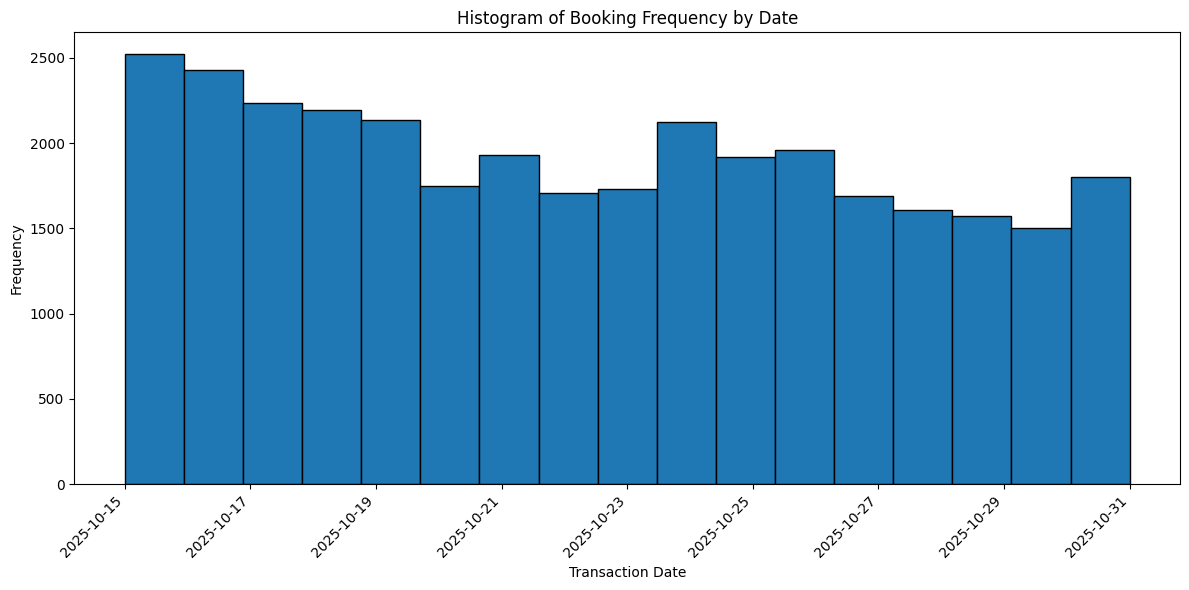

In [33]:
# Convert 'Date' column to datetime objects if it's not already
date_frequency['Date'] = pd.to_datetime(date_frequency['Date'])

# Create a histogram of the booking date frequency
plt.figure(figsize=(12, 6))
plt.hist(date_frequency['Date'], weights=date_frequency['Booking_Frequency'], bins=len(date_frequency), edgecolor='black')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.title('Histogram of Booking Frequency by Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()